In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [3]:
# Import necessary libraries
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. Normalize the pixel values (scale them between 0 and 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. Create a simple feedforward neural network (MLP)
model = Sequential()

# Flatten the input image (32x32x3 -> 3072) for the dense layers
model.add(Flatten(input_shape=(32, 32, 3)))

# First hidden layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Second hidden layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Output layer (10 neurons for 10 classes) with softmax activation
model.add(Dense(10, activation='softmax'))

# 5. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Summary of the model
model.summary()

# 7. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,050 (3.26 MB)

 Trainable params: 855,050 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2806 - loss: 1.9968 - val_accuracy: 0.3571 - val_loss: 1.7631
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3872 - loss: 1.7011 - val_accuracy: 0.4363 - val_loss: 1.6009
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4263 - loss: 1.5985 - val_accuracy: 0.4478 - val_loss: 1.5472
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4497 - loss: 1.5347 - val_accuracy: 0.4665 - val_loss: 1.5060
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4704 - loss: 1.4818 - val_accuracy: 0.4561 - val_loss: 1.5196
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4785 - loss: 1.4574 - val_accuracy: 0.4709 - val_loss: 1.5065
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4834 - loss: 1.4290 - val_accuracy: 0.4684 - val_loss: 1.4998
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4981 - loss: 1.4027 - val_accuracy:

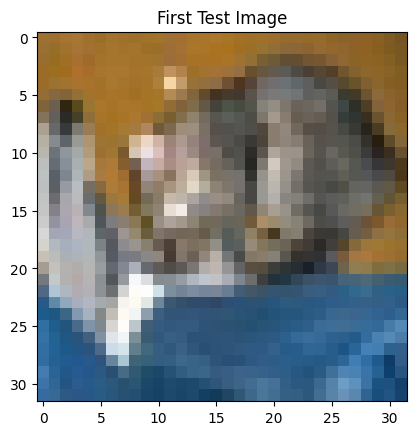

In [4]:
import matplotlib.pyplot as plt

# Display the first test image
plt.imshow(X_test[0], cmap='gray')
plt.title("First Test Image")
plt.show()

In [5]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,565,152 (9.79 MB)

 Trainable params: 855,050 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,710,102 (6.52 MB)

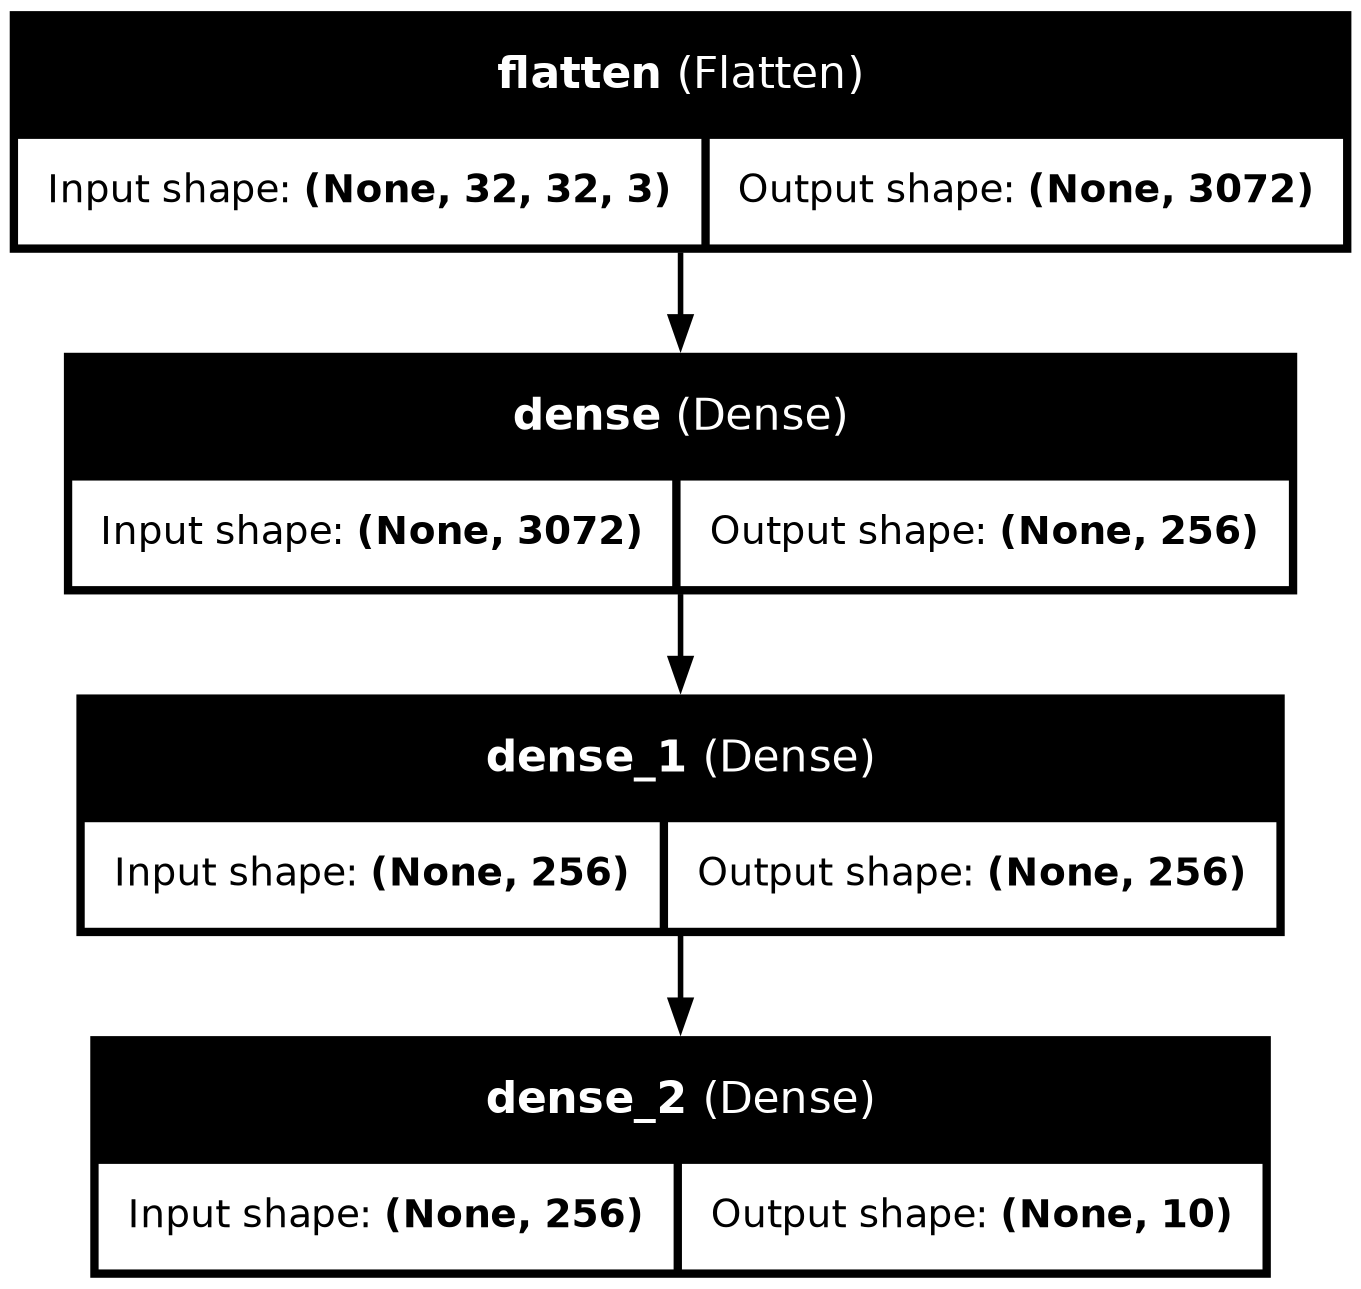

In [6]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5031 - loss: 1.4115


0.5019000172615051

In [8]:
from keras.layers import Dense, Flatten
from keras.layers import Dense, Dropout


# Add Dropout layers to reduce overfitting
model = Sequential()

# Flatten the input image (32x32x3 -> 3072) for the dense layers
model.add(Flatten(input_shape=(32, 32, 3)))

# First hidden layer with Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout 50% of the neurons

# Second hidden layer with Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (10 neurons for 10 classes) with softmax activation
model.add(Dense(10, activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1010 - loss: 2.4911


0.10029999911785126

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.1625 - loss: 2.2707 - val_accuracy: 0.2685 - val_loss: 2.0184
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2138 - loss: 2.0608 - val_accuracy: 0.2800 - val_loss: 1.9777
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2227 - loss: 2.0286 - val_accuracy: 0.2715 - val_loss: 1.9604
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.2298 - loss: 2.0162 - val_accuracy: 0.2950 - val_loss: 1.9723
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2341 - loss: 2.0149 - val_accuracy: 0.2887 - val_loss: 1.9676
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2406 - loss: 1.9963 - val_accuracy: 0.2841 - val_loss: 1.9518
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2375 - loss: 1.9979 - val_accuracy: 0.3007 - val_loss: 1.9512
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.2419 - loss: 1.9966 - 

# CNN

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [13]:
model = models.Sequential()  # build model
 
 
model.add(layers.InputLayer(shape=(32, 32, 3)))  # Input layer
 
# cnn layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # First Conv2D layer : filter
model.add(layers.MaxPooling2D((2, 2)))  # First MaxPooling layer
 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Second Conv2D layer
model.add(layers.MaxPooling2D((2, 2)))  # Second MaxPooling layer
 
# build normal ann
model.add(layers.Flatten())  # Flattening the output from Conv layers : 1 column 
model.add(layers.Dense(64, activation='relu'))  # Fully connected layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

In [14]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [15]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
 
y_train = to_categorical(y_train, 10)  # 10 classes (0-9 digits)
y_test = to_categorical(y_test, 10)

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.1006 - loss: 2.3029 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3026
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.0980 - val_loss: 2.3029
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.0998 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3028


In [18]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=64, callbacks=[early_stopping])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8434 - loss: 0.5594 - val_accuracy: 0.9505 - val_loss: 0.1812
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9542 - loss: 0.1608 - val_accuracy: 0.9586 - val_loss: 0.1411
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9678 - loss: 0.1095 - val_accuracy: 0.9663 - val_loss: 0.1131
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9772 - loss: 0.0796 - val_accuracy: 0.9664 - val_loss: 0.1097
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9821 - loss: 0.0619 - val_accuracy: 0.9710 - val_loss: 0.0967
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9858 - loss: 0.0513 - val_accuracy: 0.9718 - val_loss: 0.0926
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9890 - loss: 0.0406 - val_accuracy: 0.9741 - val_loss: 0.0881
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step -

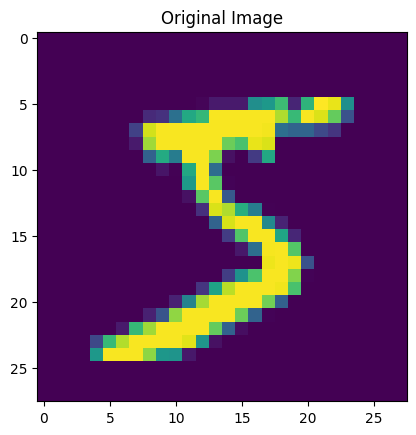

In [19]:
# Plot original image
plt.figure()
plt.title("Original Image")
plt.imshow(x_train[0]);